### Расчет бюджета на различные digital каналы по месяцам.

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [442]:
# откроем таблицу с источниками, посмотрим на данные, оставим только те, которые понадобятся для расчёта бюджета 

sources = pd.read_csv('/home/osangaraeva/Рабочий стол/sources.csv', sep=',')

In [443]:
sources = sources[['source_id', 'key', 'kind', 'ctr', 'cpm']]
sources.head()

,source_id,key,kind,ctr,cpm
0,3097,oper.ru,Online Video (In-Stream),2.0,60
1,3153,fishki.net,Online Video (In-Stream),2.0,60
2,3154,pikabu.ru,Online Video (In-Stream),2.0,400
3,3157,yaplakal.com,Online Video (In-Stream),2.0,400
4,3177,ivi.ru,Online Video (In-Stream),1.5,350


In [444]:
# откроем таблицу с долями визитов, также оставим только те столбцы, которые понадобятся для расчёта бюджета 

split = pd.read_csv('/home/osangaraeva/Рабочий стол/split.csv', sep=',')

In [445]:
split = split[['id','site_id', 'created_at', 'desktop_visit_share', 'mobile_visit_share', 'total_desktop_visits', 'referral_mobile_visits']]
split

,id,site_id,created_at,desktop_visit_share,mobile_visit_share,total_desktop_visits,referral_mobile_visits
0,465852,1310,2020-10-01,0.566946,0.433054,4808987,0
1,502514,1310,2020-11-01,0.566633,0.433367,4826024,0
2,555038,1310,2020-12-01,0.571765,0.428235,5256092,0


In [446]:
list_1 = split['id'].unique()
list_1

array([465852, 502514, 555038])

In [447]:
# откроем таблицу с количеством визитов, удалим ненужные в дальнейшем столбцы

trafficsite = pd.read_csv('/home/osangaraeva/Рабочий стол/trafficsite.csv', sep=',')

In [448]:
trafficsite = trafficsite[['site_id', 'source_id', 'visits']]
trafficsite.head()

,site_id,source_id,visits
0,1310,3097,9
1,1310,3153,9
2,1310,3154,151
3,1310,3154,352
4,1310,3157,9


In [449]:
# соединим 3 таблицы в одну

report = sources.merge(trafficsite, on='source_id').merge(split, on='site_id')
report

,source_id,key,kind,ctr,cpm,site_id,visits,id,created_at,desktop_visit_share,mobile_visit_share,total_desktop_visits,referral_mobile_visits
0,3097,oper.ru,Online Video (In-Stream),2.0,60,1310,9,465852,2020-10-01,0.566946,0.433054,4808987,0
1,3097,oper.ru,Online Video (In-Stream),2.0,60,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0
2,3097,oper.ru,Online Video (In-Stream),2.0,60,1310,9,555038,2020-12-01,0.571765,0.428235,5256092,0
3,3153,fishki.net,Online Video (In-Stream),2.0,60,1310,9,465852,2020-10-01,0.566946,0.433054,4808987,0
4,3153,fishki.net,Online Video (In-Stream),2.0,60,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,1669597,asics-events.timepad.ru,NaN,0.0,0,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0
9308,1669597,asics-events.timepad.ru,NaN,0.0,0,1310,9,555038,2020-12-01,0.571765,0.428235,5256092,0
9309,1669598,sambo-shop.com,NaN,0.0,0,1310,9,465852,2020-10-01,0.566946,0.433054,4808987,0
9310,1669598,sambo-shop.com,NaN,0.0,0,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0


In [450]:
# отфильтруем данные

report = report.query('id in @list_1')
report

,source_id,key,kind,ctr,cpm,site_id,visits,id,created_at,desktop_visit_share,mobile_visit_share,total_desktop_visits,referral_mobile_visits
0,3097,oper.ru,Online Video (In-Stream),2.0,60,1310,9,465852,2020-10-01,0.566946,0.433054,4808987,0
1,3097,oper.ru,Online Video (In-Stream),2.0,60,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0
2,3097,oper.ru,Online Video (In-Stream),2.0,60,1310,9,555038,2020-12-01,0.571765,0.428235,5256092,0
3,3153,fishki.net,Online Video (In-Stream),2.0,60,1310,9,465852,2020-10-01,0.566946,0.433054,4808987,0
4,3153,fishki.net,Online Video (In-Stream),2.0,60,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,1669597,asics-events.timepad.ru,NaN,0.0,0,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0
9308,1669597,asics-events.timepad.ru,NaN,0.0,0,1310,9,555038,2020-12-01,0.571765,0.428235,5256092,0
9309,1669598,sambo-shop.com,NaN,0.0,0,1310,9,465852,2020-10-01,0.566946,0.433054,4808987,0
9310,1669598,sambo-shop.com,NaN,0.0,0,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0


#### Добавление новых столбцов

In [451]:
# добавим столбцы 

report['mobile_visits'] = (report['mobile_visit_share'] * report['visits']).round(2)              # Количество визитов с мобильных устройств
report['desktop_visits'] = report['desktop_visit_share'] * report['visits'].round(2)              # Количество визитов с ПК
report['mobile_budget'] = report['mobile_visits'] * report['cpm']                                 # Расходы на рекламу с мобильных устройств
report['desktop_budget'] = report['desktop_visits'] * report['cpm']                               # Расходы на рекламу с ПК

In [452]:
report['created_at'] = pd.to_datetime(report['created_at'], format='%Y-%m-%dT' )                  

In [453]:
report['month'] = report['created_at'].dt.month                                                  # месяц визитов

#### Отчет со всех необходимой информацией

In [454]:
report.head()

,source_id,key,kind,ctr,cpm,site_id,visits,id,created_at,desktop_visit_share,mobile_visit_share,total_desktop_visits,referral_mobile_visits,mobile_visits,desktop_visits,mobile_budget,desktop_budget,month
0,3097,oper.ru,Online Video (In-Stream),2.0,60,1310,9,465852,2020-10-01,0.566946,0.433054,4808987,0,3.90,5.102518,234.0,306.151074,10
1,3097,oper.ru,Online Video (In-Stream),2.0,60,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0,3.90,5.099694,234.0,305.981660,11
2,3097,oper.ru,Online Video (In-Stream),2.0,60,1310,9,555038,2020-12-01,0.571765,0.428235,5256092,0,3.85,5.145888,231.0,308.753304,12
3,3153,fishki.net,Online Video (In-Stream),2.0,60,1310,9,465852,2020-10-01,0.566946,0.433054,4808987,0,3.90,5.102518,234.0,306.151074,10
4,3153,fishki.net,Online Video (In-Stream),2.0,60,1310,9,502514,2020-11-01,0.566633,0.433367,4826024,0,3.90,5.099694,234.0,305.981660,11


#### Сводная таблица с бюджетами по каналам по месяцам

In [455]:
budget_pivot = report.groupby(['kind','month'])['mobile_budget','desktop_budget'].sum().reset_index()
budget_pivot

,kind,month,mobile_budget,desktop_budget
0,Direct,10,0.000000e+00,0.000000e+00
1,Direct,11,0.000000e+00,0.000000e+00
2,Direct,12,0.000000e+00,0.000000e+00
3,Display Ad,10,1.642575e+07,2.150432e+07
4,Display Ad,11,1.643767e+07,2.149242e+07
5,Display Ad,12,1.624297e+07,2.168711e+07
6,Online Video (In-Stream),10,8.009662e+07,1.048611e+08
7,Online Video (In-Stream),11,8.015465e+07,1.048031e+08
8,Online Video (In-Stream),12,7.920531e+07,1.057524e+08
9,Organic Search,10,0.000000e+00,0.000000e+00


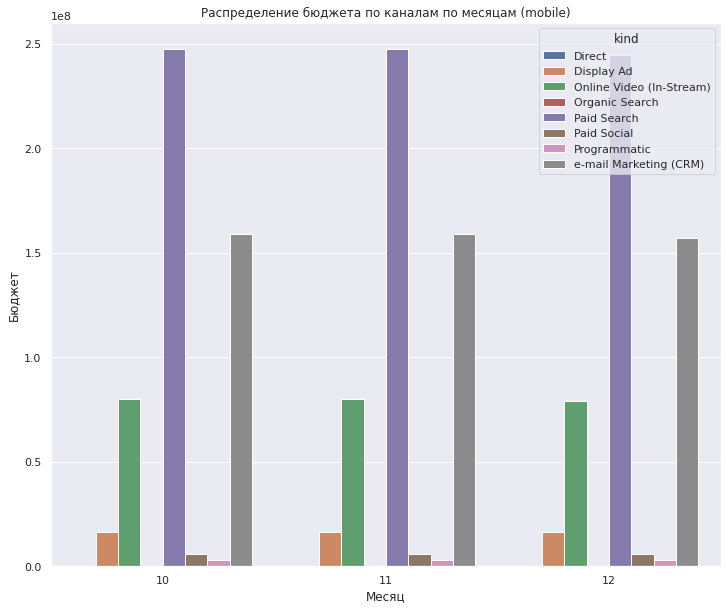

In [456]:
ax = sns.barplot(x='month',
            y='mobile_budget',
            hue="kind",
            data=budget_pivot 
                )
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Распределение бюджета по каналам по месяцам (mobile)')
ax.set(xlabel='Месяц', ylabel='Бюджет');

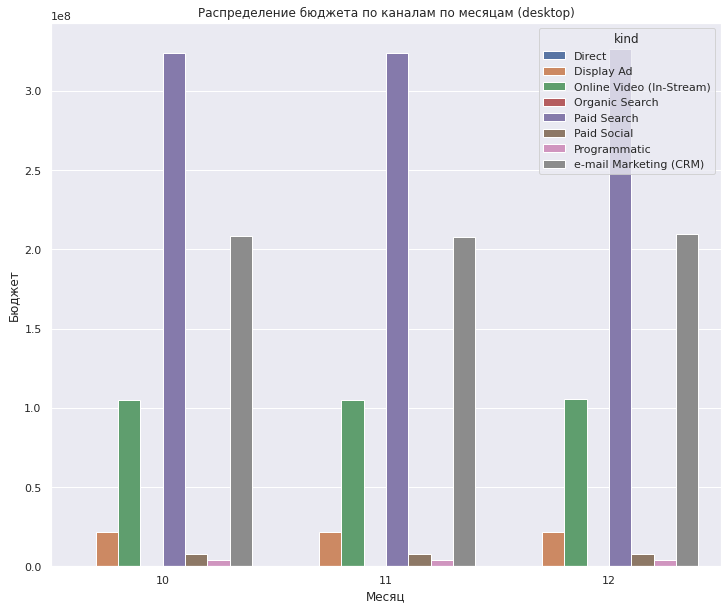

In [457]:
ax = sns.barplot(x='month',
            y='desktop_budget',
            hue="kind",
            data=budget_pivot 
                )
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Распределение бюджета по каналам по месяцам (desktop)')
ax.set(xlabel='Месяц', ylabel='Бюджет');